In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#importando la data
movie_df = pd.read_csv("data/data_procesada/movie.csv")
rating=pd.read_csv("./data/ratings/7.csv")
rating2=pd.read_csv("./data/ratings/8.csv")

In [5]:
movie_df_co=movie_df.copy()

In [6]:
#analizando contenido
movie_df.head()

,title,type,director,cast,country,date_added,release_year,rating,listed_in,description,score,id,duration_int,duration_unit,plataforma
0,duck the halls: a mickey mouse christmas special,movie,"alonso ramirez ramos, dave wasson","chris diamantopoulos, tony anselmo, tress macn...",NaN,2021-11-26,2016,tv-g,"animation, family",join mickey and the gang as they duck the halls!,100,ds1,23,min,disney
1,ernest saves christmas,movie,john cherry,"jim varney, noelle parker, douglas seale",NaN,2021-11-26,1988,pg,comedy,santa claus passes his magic bag to a new st. ...,17,ds2,91,min,disney
2,ice age: a mammoth christmas,movie,karen disher,"raymond albert romano, john leguizamo, denis l...",united states,2021-11-26,2011,tv-g,"animation, comedy, family",sid the sloth is on santa's naughty list.,92,ds3,23,min,disney
3,the queen family singalong,movie,hamish hamilton,"darren criss, adam lambert, derek hough, alexa...",NaN,2021-11-26,2021,tv-pg,musical,"this is real life, not just fantasy!",35,ds4,41,min,disney
4,the beatles: get back,tv show,NaN,"john lennon, paul mccartney, george harrison, ...",NaN,2021-11-25,2021,g,"docuseries, historical, music",a three-part documentary from peter jackson ca...,11,ds5,1,season,disney


In [7]:
movie_df.columns

Index(['title', 'type', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'listed_in', 'description', 'score', 'id',
       'duration_int', 'duration_unit', 'plataforma'],
      dtype='object')

In [8]:
rating.head()

,userId,rating,timestamp,movieId
0,265409,5.0,891417042,ds781
1,265409,5.0,891417042,as9331
2,265409,4.0,891417435,hs384
3,265409,3.0,891417191,hs398
4,265409,5.0,891417224,as8434


In [9]:
rating2.head()

,userId,rating,timestamp,movieId
0,108422,4.5,1350689762,as1399
1,108422,4.0,1350341401,as6724
2,108422,5.0,1350689691,ns512
3,108422,4.5,1350341088,ns7444
4,108422,4.5,1350689619,as2230


In [10]:
#uniendo los raiting 
rating=pd.concat([rating,rating2])

In [11]:
rating.shape

(2024289, 4)

In [12]:
movie_df.rename(columns={'id':'movieId'}, inplace=True)

In [13]:
movie_df.head()

,title,type,director,cast,country,date_added,release_year,rating,listed_in,description,score,movieId,duration_int,duration_unit,plataforma
0,duck the halls: a mickey mouse christmas special,movie,"alonso ramirez ramos, dave wasson","chris diamantopoulos, tony anselmo, tress macn...",NaN,2021-11-26,2016,tv-g,"animation, family",join mickey and the gang as they duck the halls!,100,ds1,23,min,disney
1,ernest saves christmas,movie,john cherry,"jim varney, noelle parker, douglas seale",NaN,2021-11-26,1988,pg,comedy,santa claus passes his magic bag to a new st. ...,17,ds2,91,min,disney
2,ice age: a mammoth christmas,movie,karen disher,"raymond albert romano, john leguizamo, denis l...",united states,2021-11-26,2011,tv-g,"animation, comedy, family",sid the sloth is on santa's naughty list.,92,ds3,23,min,disney
3,the queen family singalong,movie,hamish hamilton,"darren criss, adam lambert, derek hough, alexa...",NaN,2021-11-26,2021,tv-pg,musical,"this is real life, not just fantasy!",35,ds4,41,min,disney
4,the beatles: get back,tv show,NaN,"john lennon, paul mccartney, george harrison, ...",NaN,2021-11-25,2021,g,"docuseries, historical, music",a three-part documentary from peter jackson ca...,11,ds5,1,season,disney


## Analizando los datos nulos

In [14]:
#cuantas valores son faltantes
movie_df.isna().sum()

title                0
type                 0
director          7941
cast              4875
country          10920
date_added        8981
release_year         0
rating               0
listed_in            0
description          4
score                0
movieId              0
duration_int         0
duration_unit        0
plataforma           0
dtype: int64

In [15]:
movie_df.size

344970

In [16]:
# hallando el total de valores faltantes
valores_faltantes=movie_df.isna().sum().sum()
valores_completos=movie_df.size-movie_df.isna().sum().sum()
print(f'cantidad de valores faltanter: {valores_faltantes}')
print(f'catidad de datos completos: {valores_completos}')
print(f'proporcion de valores faltantes:  {valores_faltantes/movie_df.size}')

cantidad de valores faltanter: 32721
catidad de datos completos: 312249
proporcion de valores faltantes:  0.09485172623706409


In [17]:
#creando funcion funcion para hallar los valores faltantes por colunas  el toital de casos 
def missing_variable_summary(df):
    return df.isnull().pipe(
        lambda df_1: (
            df_1.sum()
            .reset_index(name="n_missing")
            .rename(columns={"index": "variable"})
            .assign(
                n_cases=len(df_1),
                pct_missing=lambda df_2: df_2.n_missing / df_2.n_cases * 100,
            )
        )
    )


In [18]:
missing_variable_summary(movie_df)

,variable,n_missing,n_cases,pct_missing
0,title,0,22998,0.000000
1,type,0,22998,0.000000
2,director,7941,22998,34.529089
3,cast,4875,22998,21.197495
4,country,10920,22998,47.482390
5,date_added,8981,22998,39.051222
6,release_year,0,22998,0.000000
7,rating,0,22998,0.000000
8,listed_in,0,22998,0.000000
9,description,4,22998,0.017393


In [19]:
#agrupando los falores faltantes por variables y la proporcion respectoa todo el dataset 
(missing_variable_summary(movie_df)
 .value_counts("n_missing")
 .reset_index()
 .rename(columns={"n_missing": "n_missing_in_variable", "count": "n_variables"})
 .assign(
                pct_variables=lambda df: df.n_variables / df.n_variables.sum() * 100
            )
).sort_values(by="pct_variables", ascending=False)

,n_missing_in_variable,n_variables,pct_variables
0,0,10,66.666667
1,4,1,6.666667
2,4875,1,6.666667
3,7941,1,6.666667
4,8981,1,6.666667
5,10920,1,6.666667


In [20]:
def missing_variable_table(df):
    data=missing_variable_summary(movie_df)
    return (
        data
        .value_counts("n_missing")
        .reset_index()
        .rename(columns={"n_missing": "n_missing_in_variable", "count": "n_variables"})
        .assign(
            pct_variables=lambda df: df.n_variables / df.n_variables.sum() * 100
        )
        .sort_values("pct_variables", ascending=False)
    )

In [21]:
missing_variable_table(movie_df)

,n_missing_in_variable,n_variables,pct_variables
0,0,10,66.666667
1,4,1,6.666667
2,4875,1,6.666667
3,7941,1,6.666667
4,8981,1,6.666667
5,10920,1,6.666667


In [22]:
#explorando caso a caso
def missing_case_summary(df) :
        return df.assign(
            case=lambda df: df.index,
            n_missing=lambda df: df.apply(
                axis="columns", func=lambda row: row.isna().sum()
            ),
            pct_missing=lambda df: df["n_missing"] / df.shape[1] * 100,
        )[["case", "n_missing", "pct_missing"]]

In [23]:
#se evalue casos a caso donde por la cantidad de registros faltantes
missing_case_summary(movie_df).head()

,case,n_missing,pct_missing
0,0,1,5.882353
1,1,1,5.882353
2,2,0,0.000000
3,3,1,5.882353
4,4,2,11.764706


In [24]:
#cramos una funcion pra que nos diga los valores por intervalos
def missing_variable_span(df, variable: str, span_every: int):
    return (
        df.assign(
            span_counter=lambda df: (
                np.repeat(a=range(df.shape[0]), repeats=span_every)[: df.shape[0]]
            )
        )
        .groupby("span_counter")
        .aggregate(
            n_in_span=(variable, "size"),
            n_missing=(variable, lambda s: s.isnull().sum()),
        )
        .assign(
            n_complete=lambda df: df.n_in_span - df.n_missing,
            pct_missing=lambda df: df.n_missing / df.n_in_span * 100,
            pct_complete=lambda df: 100 - df.pct_missing,
        )
        .drop(columns=["n_in_span"])
        .reset_index()
    )

In [25]:
(
    missing_variable_span(
    movie_df,
    variable="country",
    span_every=100
    )
)

,span_counter,n_missing,n_complete,pct_missing,pct_complete
0,0,50,50,50.000000,50.000000
1,1,44,56,44.000000,56.000000
2,2,38,62,38.000000,62.000000
3,3,15,85,15.000000,85.000000
4,4,19,81,19.000000,81.000000
...,...,...,...,...,...
225,225,10,90,10.000000,90.000000
226,226,6,94,6.000000,94.000000
227,227,11,89,11.000000,89.000000
228,228,7,93,7.000000,93.000000


In [26]:
values=movie_df['movieId'].unique()
values.shape

(22998,)

In [27]:
movie_df_co[movie_df_co['title']=='duck the halls: a mickey mouse christmas special']

,title,type,director,cast,country,date_added,release_year,rating,listed_in,description,score,id,duration_int,duration_unit,plataforma
0,duck the halls: a mickey mouse christmas special,movie,"alonso ramirez ramos, dave wasson","chris diamantopoulos, tony anselmo, tress macn...",NaN,2021-11-26,2016,tv-g,"animation, family",join mickey and the gang as they duck the halls!,100,ds1,23,min,disney


In [28]:
disney=movie_df_co[movie_df_co['plataforma']=='amazon']['country'].value_counts().reset_index()
disney

,country,count
0,united states,487
1,india,262
2,united kingdom,77
3,canada,28
4,"united kingdom, united states",24
...,...,...
148,"iran, france",1
149,"czech republic, germany",1
150,"united kingdom, hungary, united states",1
151,"india, sweden",1


In [29]:
import re

In [30]:
disney.loc[disney['country'].str.contains('united states',flags=re.I,regex=True)]

,country,count
0,united states,487
4,"united kingdom, united states",24
8,"canada, united states",10
10,"united states, united kingdom",9
13,"united states, canada",5
...,...,...
144,"united states, ireland",1
145,"united states, france, denmark",1
146,"united states, united kingdom, canada",1
147,"united states, czech republic, spain",1


In [31]:
movie_df=movie_df.merge(rating,how='left',on='movieId')

In [32]:
movie_df

,title,type,director,cast,country,date_added,release_year,rating_x,listed_in,description,score,movieId,duration_int,duration_unit,plataforma,userId,rating_y,timestamp
0,duck the halls: a mickey mouse christmas special,movie,"alonso ramirez ramos, dave wasson","chris diamantopoulos, tony anselmo, tress macn...",NaN,2021-11-26,2016,tv-g,"animation, family",join mickey and the gang as they duck the halls!,100,ds1,23,min,disney,265577,4.0,864222401
1,duck the halls: a mickey mouse christmas special,movie,"alonso ramirez ramos, dave wasson","chris diamantopoulos, tony anselmo, tress macn...",NaN,2021-11-26,2016,tv-g,"animation, family",join mickey and the gang as they duck the halls!,100,ds1,23,min,disney,265812,4.0,1466252341
2,duck the halls: a mickey mouse christmas special,movie,"alonso ramirez ramos, dave wasson","chris diamantopoulos, tony anselmo, tress macn...",NaN,2021-11-26,2016,tv-g,"animation, family",join mickey and the gang as they duck the halls!,100,ds1,23,min,disney,265824,4.0,875540316
3,duck the halls: a mickey mouse christmas special,movie,"alonso ramirez ramos, dave wasson","chris diamantopoulos, tony anselmo, tress macn...",NaN,2021-11-26,2016,tv-g,"animation, family",join mickey and the gang as they duck the halls!,100,ds1,23,min,disney,265928,4.0,1227568030
4,duck the halls: a mickey mouse christmas special,movie,"alonso ramirez ramos, dave wasson","chris diamantopoulos, tony anselmo, tress macn...",NaN,2021-11-26,2016,tv-g,"animation, family",join mickey and the gang as they duck the halls!,100,ds1,23,min,disney,266534,5.0,842034476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024284,tokyo magnitude 8.0,tv show,NaN,NaN,japan,NaN,2009,tv-14,"anime, drama, international",the devastation is unleashed in the span of se...,47,hs3073,1,season,hulu,123210,4.0,1234647548
2024285,tokyo magnitude 8.0,tv show,NaN,NaN,japan,NaN,2009,tv-14,"anime, drama, international",the devastation is unleashed in the span of se...,47,hs3073,1,season,hulu,123293,3.0,1265248578
2024286,tokyo magnitude 8.0,tv show,NaN,NaN,japan,NaN,2009,tv-14,"anime, drama, international",the devastation is unleashed in the span of se...,47,hs3073,1,season,hulu,123309,5.0,845105878
2024287,tokyo magnitude 8.0,tv show,NaN,NaN,japan,NaN,2009,tv-14,"anime, drama, international",the devastation is unleashed in the span of se...,47,hs3073,1,season,hulu,124040,2.5,1442077773


In [33]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2024289 entries, 0 to 2024288
Data columns (total 18 columns):
 #   Column         Dtype  
---  ------         -----  
 0   title          object 
 1   type           object 
 2   director       object 
 3   cast           object 
 4   country        object 
 5   date_added     object 
 6   release_year   int64  
 7   rating_x       object 
 8   listed_in      object 
 9   description    object 
 10  score          int64  
 11  movieId        object 
 12  duration_int   int64  
 13  duration_unit  object 
 14  plataforma     object 
 15  userId         int64  
 16  rating_y       float64
 17  timestamp      int64  
dtypes: float64(1), int64(5), object(12)
memory usage: 278.0+ MB


In [34]:
del movie_df['timestamp']
del movie_df['rating_x']
del movie_df['director']

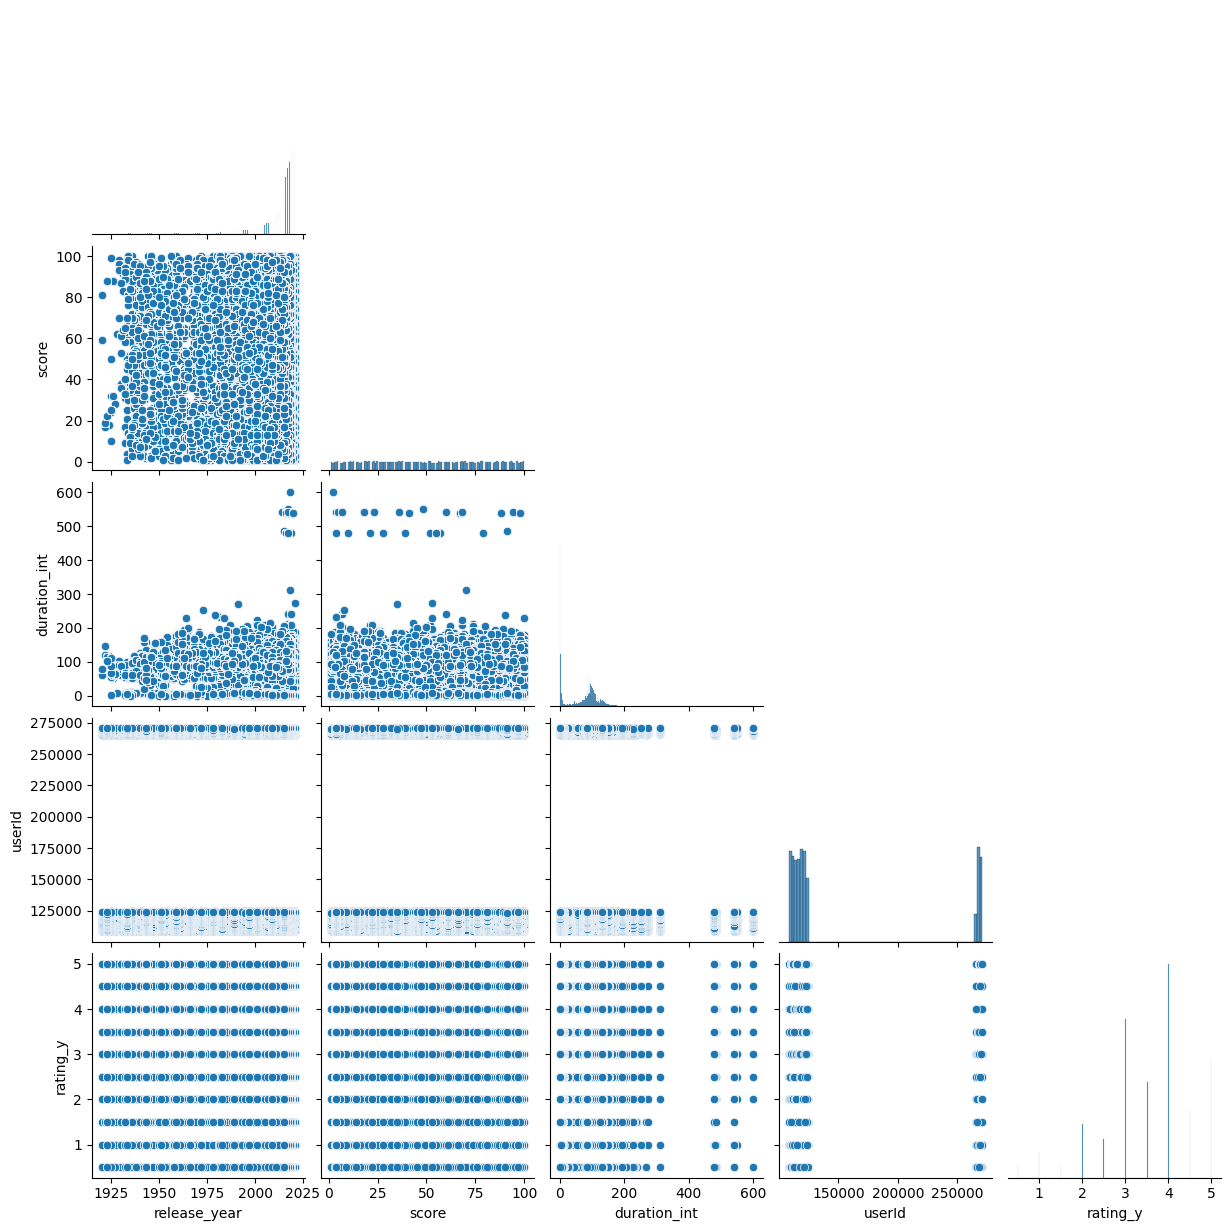

In [35]:
sns.pairplot(data=movie_df,corner=True)
plt.show()

In [36]:
plt.show()

<Axes: xlabel='plataforma', ylabel='rating_y'>

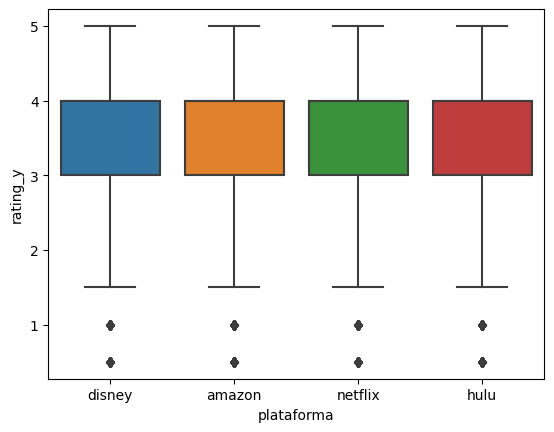

In [37]:
#viendo el pormedio de rating por plataforma
sns.boxplot(data=movie_df,x='plataforma',y='rating_y')

<Axes: xlabel='plataforma', ylabel='duration_int'>

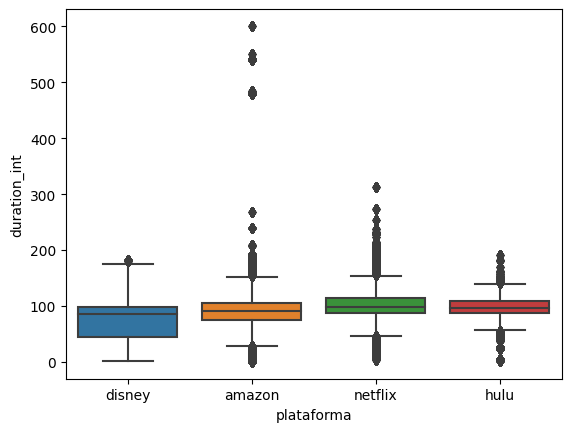

In [38]:
#deteccion de aulayer 
sns.boxplot(data=movie_df[movie_df['duration_unit']=='min'],x='plataforma',y='duration_int')

In [39]:
movie_df[(movie_df['duration_unit']=='min')&(movie_df['duration_int']>312)]

,title,type,cast,country,date_added,release_year,listed_in,description,score,movieId,duration_int,duration_unit,plataforma,userId,rating_y
141178,waterfalls for sleep 8 hours,movie,NaN,NaN,NaN,2016,"documentary, special interest",featuring uninterrupted ultra dark video of ni...,10,as148,480,min,amazon,265427,4.0
141179,waterfalls for sleep 8 hours,movie,NaN,NaN,NaN,2016,"documentary, special interest",featuring uninterrupted ultra dark video of ni...,10,as148,480,min,amazon,265689,4.0
141180,waterfalls for sleep 8 hours,movie,NaN,NaN,NaN,2016,"documentary, special interest",featuring uninterrupted ultra dark video of ni...,10,as148,480,min,amazon,266061,4.0
141181,waterfalls for sleep 8 hours,movie,NaN,NaN,NaN,2016,"documentary, special interest",featuring uninterrupted ultra dark video of ni...,10,as148,480,min,amazon,266255,4.5
141182,waterfalls for sleep 8 hours,movie,NaN,NaN,NaN,2016,"documentary, special interest",featuring uninterrupted ultra dark video of ni...,10,as148,480,min,amazon,266667,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798837,night sky with nature sounds with 432hz nature...,movie,mary kay kayaltizer,NaN,NaN,2020,special interest,slumber off to a deep and refreshing sleep wit...,88,as7616,540,min,amazon,123652,3.0
798838,night sky with nature sounds with 432hz nature...,movie,mary kay kayaltizer,NaN,NaN,2020,special interest,slumber off to a deep and refreshing sleep wit...,88,as7616,540,min,amazon,123703,4.0
798839,night sky with nature sounds with 432hz nature...,movie,mary kay kayaltizer,NaN,NaN,2020,special interest,slumber off to a deep and refreshing sleep wit...,88,as7616,540,min,amazon,123777,4.0
798840,night sky with nature sounds with 432hz nature...,movie,mary kay kayaltizer,NaN,NaN,2020,special interest,slumber off to a deep and refreshing sleep wit...,88,as7616,540,min,amazon,123882,3.5


In [40]:
movie_df[(movie_df['duration_unit']=='min')&(movie_df['duration_int']>312)]

,title,type,cast,country,date_added,release_year,listed_in,description,score,movieId,duration_int,duration_unit,plataforma,userId,rating_y
141178,waterfalls for sleep 8 hours,movie,NaN,NaN,NaN,2016,"documentary, special interest",featuring uninterrupted ultra dark video of ni...,10,as148,480,min,amazon,265427,4.0
141179,waterfalls for sleep 8 hours,movie,NaN,NaN,NaN,2016,"documentary, special interest",featuring uninterrupted ultra dark video of ni...,10,as148,480,min,amazon,265689,4.0
141180,waterfalls for sleep 8 hours,movie,NaN,NaN,NaN,2016,"documentary, special interest",featuring uninterrupted ultra dark video of ni...,10,as148,480,min,amazon,266061,4.0
141181,waterfalls for sleep 8 hours,movie,NaN,NaN,NaN,2016,"documentary, special interest",featuring uninterrupted ultra dark video of ni...,10,as148,480,min,amazon,266255,4.5
141182,waterfalls for sleep 8 hours,movie,NaN,NaN,NaN,2016,"documentary, special interest",featuring uninterrupted ultra dark video of ni...,10,as148,480,min,amazon,266667,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798837,night sky with nature sounds with 432hz nature...,movie,mary kay kayaltizer,NaN,NaN,2020,special interest,slumber off to a deep and refreshing sleep wit...,88,as7616,540,min,amazon,123652,3.0
798838,night sky with nature sounds with 432hz nature...,movie,mary kay kayaltizer,NaN,NaN,2020,special interest,slumber off to a deep and refreshing sleep wit...,88,as7616,540,min,amazon,123703,4.0
798839,night sky with nature sounds with 432hz nature...,movie,mary kay kayaltizer,NaN,NaN,2020,special interest,slumber off to a deep and refreshing sleep wit...,88,as7616,540,min,amazon,123777,4.0
798840,night sky with nature sounds with 432hz nature...,movie,mary kay kayaltizer,NaN,NaN,2020,special interest,slumber off to a deep and refreshing sleep wit...,88,as7616,540,min,amazon,123882,3.5


<Axes: xlabel='plataforma', ylabel='count'>

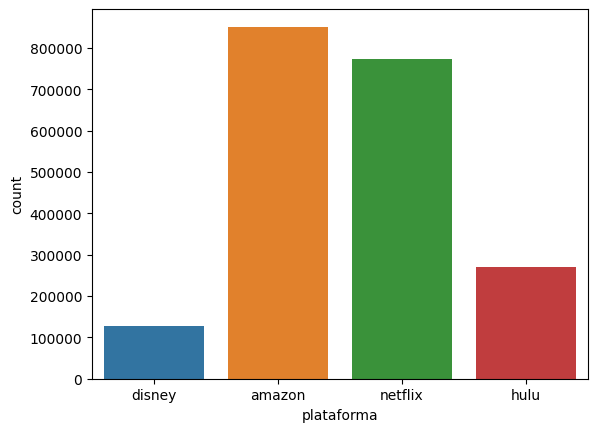

In [41]:
sns.countplot(data=movie_df,x='plataforma')

<Axes: xlabel='release_year', ylabel='score'>

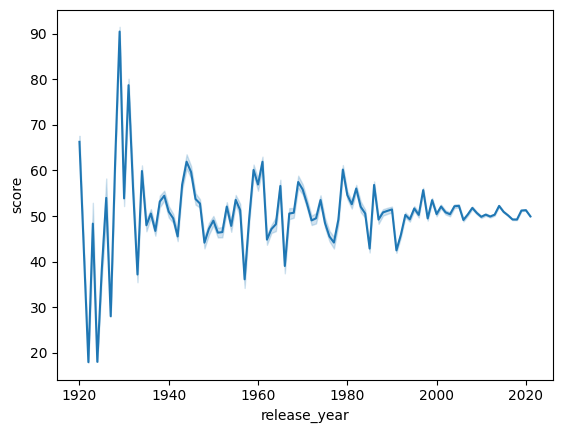

In [47]:
sns.lineplot(data=movie_df,x='release_year',y='score')

In [49]:
movie_df['plataforma'].unique()

array(['disney', 'amazon', 'netflix', 'hulu'], dtype=object)

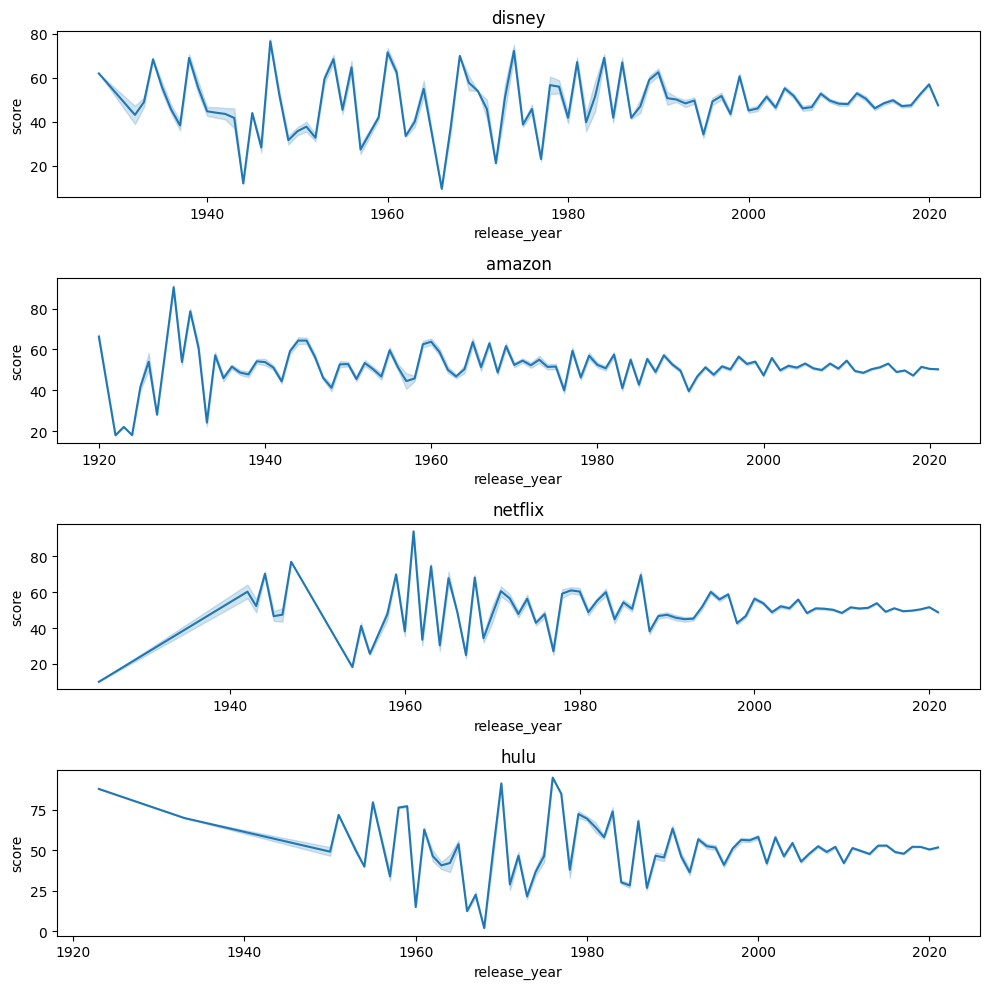

In [65]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(4, 1, figsize=(10, 10))
i=0
for plataforma in movie_df['plataforma'].unique():
    sns.lineplot(data=movie_df[movie_df['plataforma']==plataforma],x='release_year',y='score',ax=axs[i])
    axs[i].set_title(plataforma)
    i=i+1
fig.tight_layout()

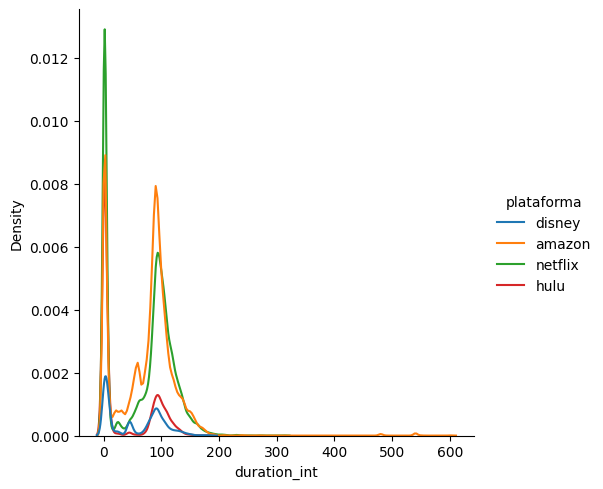

In [42]:
sns.displot(data=movie_df,x='duration_int',hue='plataforma',kind='kde')

<Axes: xlabel='score'>

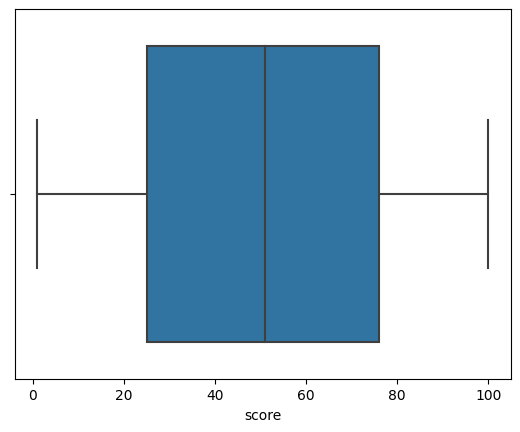

In [43]:
sns.boxplot(data=movie_df,x='score')